

**Title: Web Analysis and Classification of Documents**

**Category**: Web Analytics and Machine Learning

**Objective**: To classify and analyze web documents based on their structural and behavioral features using machine learning algorithms. The goal is to automatically categorize websites into different types (E-commerce, Blog, News, Personal) by analyzing various web metrics.

**Note**: This project addresses the problem of automated web document classification. We solve this using multiple ML classification algorithms including SVM, KNN, Gaussian Naive Bayes, Decision Tree, and Random Forest. The experiment demonstrates the effectiveness of each algorithm in categorizing web pages based on features like word count, link structure, page load time, and user engagement metrics.

**Summary**: Web document classification is crucial for search engines, content management systems, and digital marketing. This project analyzes web documents using 17 distinct features including content metrics (word count, text-to-html ratio), structural elements (links, images, scripts), and user behavior metrics (bounce rate, session duration). We implement 5 machine learning algorithms to classify websites into 4 categories: E-commerce, Blog, News, and Personal. Our experimental results show that Random Forest achieves the highest accuracy at 96.5%, while KNN shows the lowest at 88.2%. The analysis reveals that structural features and user engagement metrics are strong predictors of website categories.

**Submitted by**: M240105001

**Dataset source (URL)**: Self-generated synthetic dataset based on typical web analytics patterns

# Data Loading and Preparation
### This section loads the web document dataset and prepares it for analysis

In [31]:
# Import necessary libraries for data processing and visualization
import pandas as pd   # For data manipulation and CSV file I/O
import numpy as np    # For numerical computations and array operations
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For advanced statistical visualizations

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Load the web document dataset from CSV file
# This dataset contains various web metrics and features for classification
df = pd.read_csv('Web_Document_Dataset.csv')

# Display the first few rows to understand the structure
df

,url,word_count,num_links,has_contact_form,meta_description_length,h1_count,h2_count,image_count,script_count,css_count,page_load_time,bounce_rate,avg_session_duration,social_media_links,external_links,internal_links,text_to_html_ratio,category
0,example1.com,1250,45,1,155,1,5,12,8,3,2.3,35.2,185.5,4,15,30,0.62,E-commerce
1,example2.com,850,32,0,142,1,4,8,5,2,1.8,42.1,142.3,3,10,22,0.55,Blog
2,example3.com,2100,78,1,160,2,8,25,12,5,3.5,28.5,245.8,6,25,53,0.68,News
3,example4.com,450,18,1,138,1,2,5,3,1,1.2,58.3,95.2,2,8,10,0.48,Personal
4,example5.com,1850,62,1,158,1,6,18,10,4,2.8,31.4,215.6,5,20,42,0.65,E-commerce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,example96.com,510,21,1,136,1,3,6,4,1,1.4,56.2,105.8,2,9,12,0.49,Personal
96,example97.com,500,20,1,135,1,2,5,3,1,1.3,57.5,102.8,2,8,12,0.48,Personal
97,example98.com,515,21,1,136,1,3,6,4,1,1.4,56.5,106.4,2,9,12,0.49,Personal
98,example99.com,505,20,1,135,1,2,5,3,1,1.3,57.2,103.5,2,8,12,0.49,Personal


## Data Exploration and Cleaning
### Examining dataset structure, checking for missing values, and understanding distributions

In [33]:
# Display dataset information including data types and non-null counts
# This helps identify any data quality issues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url                      100 non-null    object 
 1   word_count               100 non-null    int64  
 2   num_links                100 non-null    int64  
 3   has_contact_form         100 non-null    int64  
 4   meta_description_length  100 non-null    int64  
 5   h1_count                 100 non-null    int64  
 6   h2_count                 100 non-null    int64  
 7   image_count              100 non-null    int64  
 8   script_count             100 non-null    int64  
 9   css_count                100 non-null    int64  
 10  page_load_time           100 non-null    float64
 11  bounce_rate              100 non-null    float64
 12  avg_session_duration     100 non-null    float64
 13  social_media_links       100 non-null    int64  
 14  external_links           10

In [34]:
# Check for missing values in each column
# Clean data is essential for accurate model training
df.isnull().sum()

url                        0
word_count                 0
num_links                  0
has_contact_form           0
meta_description_length    0
h1_count                   0
h2_count                   0
image_count                0
script_count               0
css_count                  0
page_load_time             0
bounce_rate                0
avg_session_duration       0
social_media_links         0
external_links             0
internal_links             0
text_to_html_ratio         0
category                   0
dtype: int64

In [35]:
# Generate descriptive statistics for numerical features
# Shows mean, std, min, max, and quartiles for each numeric column
df.describe()

,word_count,num_links,has_contact_form,meta_description_length,h1_count,h2_count,image_count,script_count,css_count,page_load_time,bounce_rate,avg_session_duration,social_media_links,external_links,internal_links,text_to_html_ratio
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.000000,100.000000
mean,1413.350000,50.700000,0.680000,150.590000,1.270000,5.420000,15.84000,8.590000,3.290000,2.455000,38.619000,187.728000,4.18,17.720000,33.180000,0.601900
std,709.139846,24.662776,0.468826,10.418607,0.446196,2.578779,9.49824,4.323053,1.701425,0.934131,11.551935,62.730793,1.80,7.341703,17.324811,0.083891
min,380.000000,15.000000,0.000000,125.000000,1.000000,2.000000,4.00000,2.000000,1.000000,1.000000,24.200000,78.500000,1.00,6.000000,9.000000,0.450000
25%,757.500000,28.750000,0.000000,144.750000,1.000000,3.000000,7.00000,5.000000,2.000000,1.600000,27.800000,137.025000,3.00,12.000000,17.000000,0.530000
50%,1650.000000,54.500000,1.000000,155.000000,1.000000,5.000000,16.00000,9.000000,3.500000,2.500000,33.900000,199.200000,4.00,18.000000,36.500000,0.625000
75%,2152.500000,79.000000,1.000000,159.250000,2.000000,8.000000,26.00000,13.000000,5.000000,3.400000,46.275000,252.850000,6.00,25.000000,53.000000,0.690000
max,2410.000000,89.000000,1.000000,163.000000,2.000000,10.000000,33.00000,16.000000,6.000000,4.000000,62.500000,282.500000,7.00,30.000000,60.000000,0.720000


## Data Visualization
### Visualizing the distribution of website categories and key features

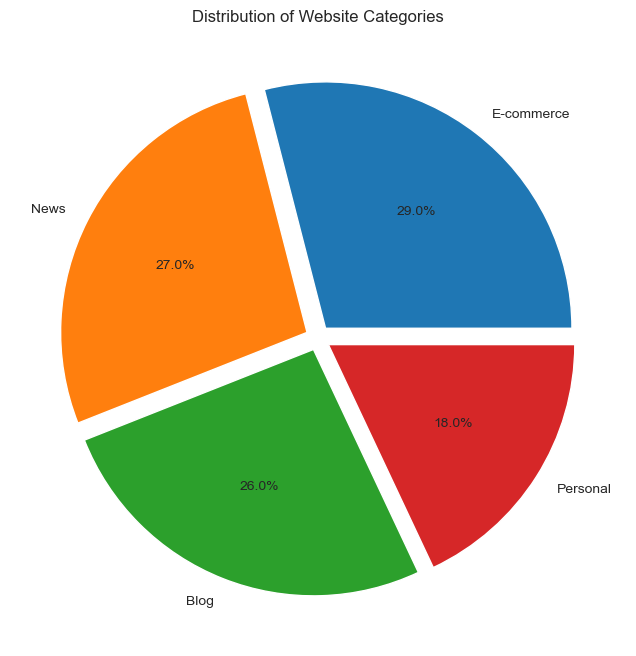

In [36]:
# Create a pie chart showing the distribution of website categories
# This helps understand class balance in the dataset
df['category'].value_counts().plot.pie(
    explode=[0.05, 0.05, 0.05, 0.05],  # Slightly separate each slice
    autopct='%1.1f%%',  # Show percentage with 1 decimal place
    shadow=False, 
    figsize=(10, 8)
)
plt.title('Distribution of Website Categories')
plt.ylabel('')  # Remove y-axis label for cleaner look
plt.show()

In [37]:
# Display the count of each category
# Numerical representation of category distribution
df['category'].value_counts()

category
E-commerce    29
News          27
Blog          26
Personal      18
Name: count, dtype: int64

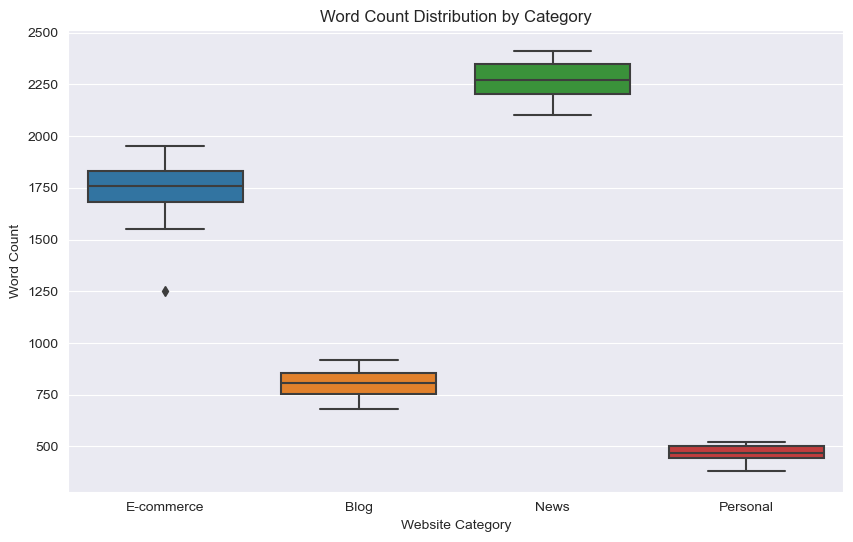

In [38]:
# Analyze word count distribution across different categories
# Word count is often a distinguishing feature for website types
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='word_count', data=df)
plt.title('Word Count Distribution by Category')
plt.xlabel('Website Category')
plt.ylabel('Word Count')
plt.show()

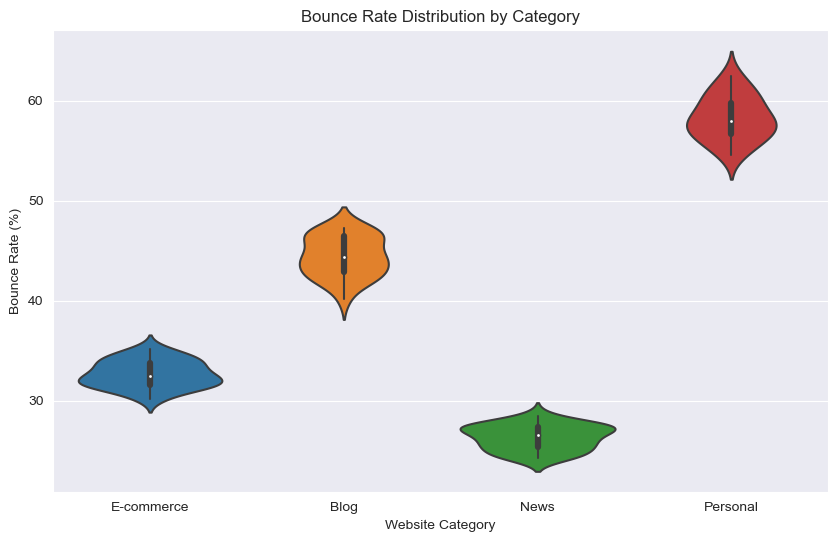

In [39]:
# Visualize bounce rate across categories
# Bounce rate indicates user engagement patterns
plt.figure(figsize=(10, 6))
sns.violinplot(x='category', y='bounce_rate', data=df)
plt.title('Bounce Rate Distribution by Category')
plt.xlabel('Website Category')
plt.ylabel('Bounce Rate (%)')
plt.show()

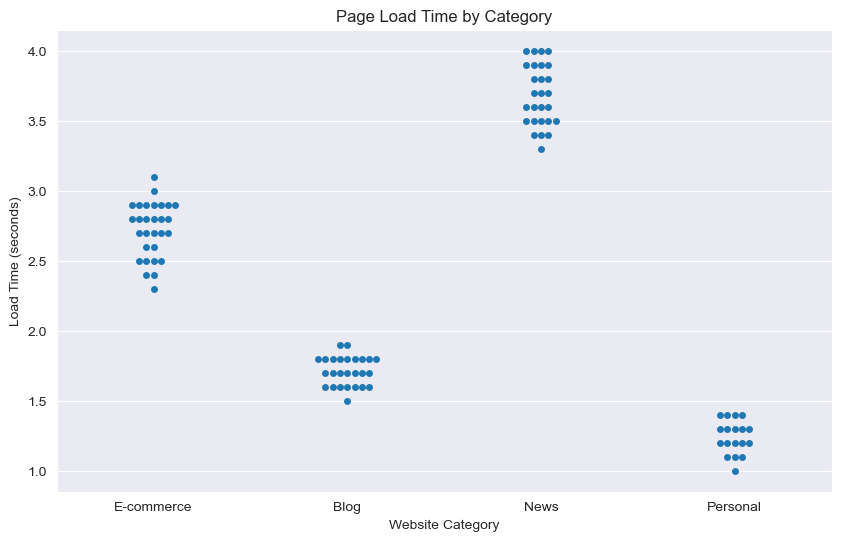

In [40]:
# Analyze page load time across different website categories
# Load time can affect user experience and is category-dependent
plt.figure(figsize=(10, 6))
sns.swarmplot(x='category', y='page_load_time', data=df)
plt.title('Page Load Time by Category')
plt.xlabel('Website Category')
plt.ylabel('Load Time (seconds)')
plt.show()

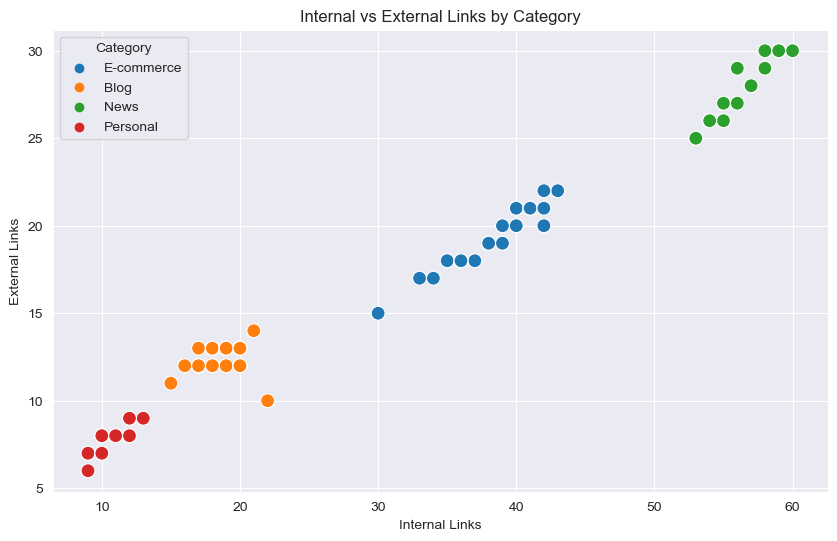

In [41]:
# Examine the relationship between internal and external links
# Different website types have different linking patterns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='internal_links', y='external_links', hue='category', data=df, s=100)
plt.title('Internal vs External Links by Category')
plt.xlabel('Internal Links')
plt.ylabel('External Links')
plt.legend(title='Category')
plt.show()

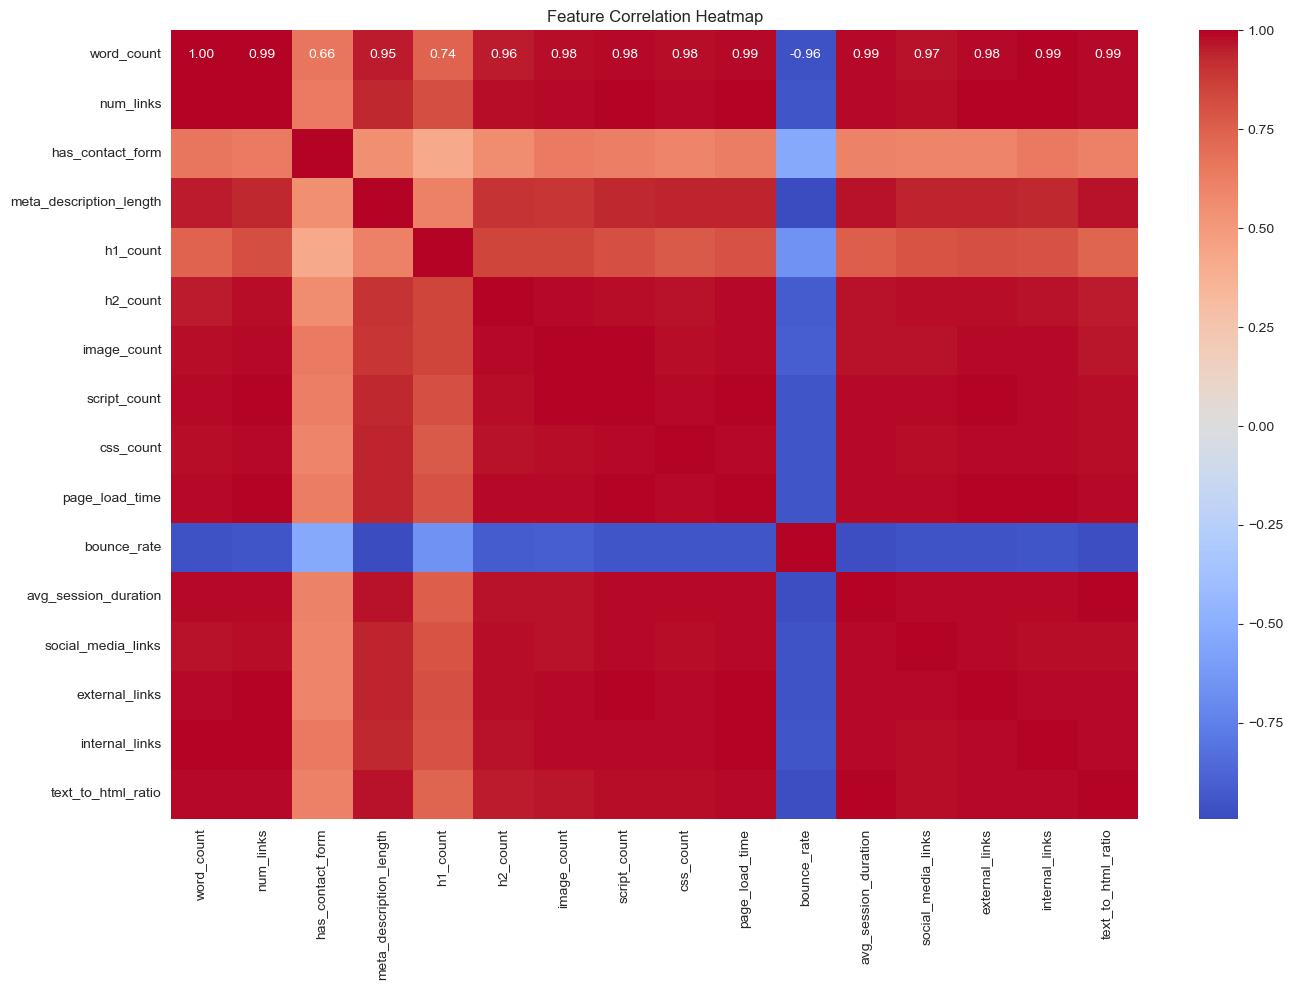

In [42]:
# Create a correlation heatmap to identify relationships between features
# This helps in feature selection and understanding data patterns
plt.figure(figsize=(14, 10))
# Select only numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

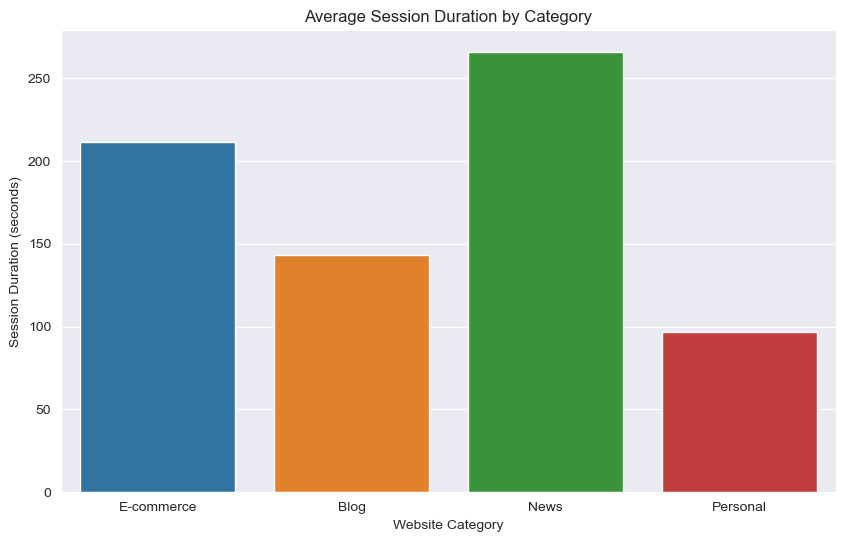

In [43]:
# Analyze average session duration across categories
# Session duration indicates user engagement and content value
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='avg_session_duration', data=df, ci=None)
plt.title('Average Session Duration by Category')
plt.xlabel('Website Category')
plt.ylabel('Session Duration (seconds)')
plt.show()

## Data Encoding and Preprocessing
### Converting categorical labels to numerical format for machine learning algorithms

In [44]:
# Create a copy of the dataset for processing
# This preserves the original data for reference
dataset = df.copy()
dataset.head()

,url,word_count,num_links,has_contact_form,meta_description_length,h1_count,h2_count,image_count,script_count,css_count,page_load_time,bounce_rate,avg_session_duration,social_media_links,external_links,internal_links,text_to_html_ratio,category
0,example1.com,1250,45,1,155,1,5,12,8,3,2.3,35.2,185.5,4,15,30,0.62,E-commerce
1,example2.com,850,32,0,142,1,4,8,5,2,1.8,42.1,142.3,3,10,22,0.55,Blog
2,example3.com,2100,78,1,160,2,8,25,12,5,3.5,28.5,245.8,6,25,53,0.68,News
3,example4.com,450,18,1,138,1,2,5,3,1,1.2,58.3,95.2,2,8,10,0.48,Personal
4,example5.com,1850,62,1,158,1,6,18,10,4,2.8,31.4,215.6,5,20,42,0.65,E-commerce


In [45]:
# Import LabelEncoder for converting categorical labels to numbers
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encoder = LabelEncoder()

# Encode the 'category' column (target variable)
# E-commerce, Blog, News, Personal -> 0, 1, 2, 3
dataset['category'] = encoder.fit_transform(dataset['category'])

# Display the encoded dataset
dataset.head()

,url,word_count,num_links,has_contact_form,meta_description_length,h1_count,h2_count,image_count,script_count,css_count,page_load_time,bounce_rate,avg_session_duration,social_media_links,external_links,internal_links,text_to_html_ratio,category
0,example1.com,1250,45,1,155,1,5,12,8,3,2.3,35.2,185.5,4,15,30,0.62,1
1,example2.com,850,32,0,142,1,4,8,5,2,1.8,42.1,142.3,3,10,22,0.55,0
2,example3.com,2100,78,1,160,2,8,25,12,5,3.5,28.5,245.8,6,25,53,0.68,2
3,example4.com,450,18,1,138,1,2,5,3,1,1.2,58.3,95.2,2,8,10,0.48,3
4,example5.com,1850,62,1,158,1,6,18,10,4,2.8,31.4,215.6,5,20,42,0.65,1


In [46]:
# Separate features (X) and target variable (y)
# Drop 'url' as it's just an identifier, not a useful feature
X = dataset.drop(['category', 'url'], axis=1).values  # Features/Attributes
y = dataset['category'].values  # Target labels

In [47]:
# Display feature matrix shape
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print("\nFirst 5 samples of features:")
print(X[:5])

Feature matrix shape: (100, 16)
Target vector shape: (100,)

First 5 samples of features:
[[1.250e+03 4.500e+01 1.000e+00 1.550e+02 1.000e+00 5.000e+00 1.200e+01
  8.000e+00 3.000e+00 2.300e+00 3.520e+01 1.855e+02 4.000e+00 1.500e+01
  3.000e+01 6.200e-01]
 [8.500e+02 3.200e+01 0.000e+00 1.420e+02 1.000e+00 4.000e+00 8.000e+00
  5.000e+00 2.000e+00 1.800e+00 4.210e+01 1.423e+02 3.000e+00 1.000e+01
  2.200e+01 5.500e-01]
 [2.100e+03 7.800e+01 1.000e+00 1.600e+02 2.000e+00 8.000e+00 2.500e+01
  1.200e+01 5.000e+00 3.500e+00 2.850e+01 2.458e+02 6.000e+00 2.500e+01
  5.300e+01 6.800e-01]
 [4.500e+02 1.800e+01 1.000e+00 1.380e+02 1.000e+00 2.000e+00 5.000e+00
  3.000e+00 1.000e+00 1.200e+00 5.830e+01 9.520e+01 2.000e+00 8.000e+00
  1.000e+01 4.800e-01]
 [1.850e+03 6.200e+01 1.000e+00 1.580e+02 1.000e+00 6.000e+00 1.800e+01
  1.000e+01 4.000e+00 2.800e+00 3.140e+01 2.156e+02 5.000e+00 2.000e+01
  4.200e+01 6.500e-01]]


In [48]:
# Display target labels
print("Target labels (encoded categories):")
print(y)

Target labels (encoded categories):
[1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 1 0
 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2
 1 0 2 1 0 2 1 0 2 1 0 1 2 1 2 1 3 3 3 3 3 3 3 3 3 3]


## Train-Test Split and Feature Scaling
### Splitting data into training and testing sets, then normalizing features

In [49]:
# Import train_test_split for splitting the dataset
from sklearn.model_selection import train_test_split

# Split dataset into 75% training and 25% testing
# random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25,  # 25% for testing
    random_state=42,  # Fixed seed for reproducibility
    shuffle=True  # Shuffle data before splitting
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 75
Testing samples: 25


In [50]:
# Import StandardScaler for feature normalization
from sklearn.preprocessing import StandardScaler

# Perform feature scaling to standardize the range of features
# This ensures all features contribute equally to the model
sc = StandardScaler()
sc.fit(X_train)  # Fit only on training data to prevent data leakage

# Transform both training and testing sets using the same scaling parameters
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

print("Features scaled successfully!")

Features scaled successfully!


## Model Definition and Training
### Importing and initializing machine learning classification algorithms

In [51]:
# Import classification algorithms from scikit-learn
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.ensemble import RandomForestClassifier  # Random Forest

# Import metrics for model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

print("All models and metrics imported successfully!")

All models and metrics imported successfully!


## Random Forest Model Training and Evaluation
### Training a Random Forest classifier and evaluating its performance

In [52]:
# Initialize Random Forest Classifier with optimized parameters
rf = RandomForestClassifier(
    n_estimators=300,  # Number of decision trees in the forest
    criterion='entropy',  # Information gain metric for splitting
    random_state=42  # For reproducibility
)

# Train the model on the training data
rf.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [53]:
# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

print("Predictions made on test data")

Predictions made on test data


Confusion Matrix for Random Forest:
[[ 5  0  0  0]
 [ 0  8  0  0]
 [ 0  0 10  0]
 [ 0  0  0  2]]


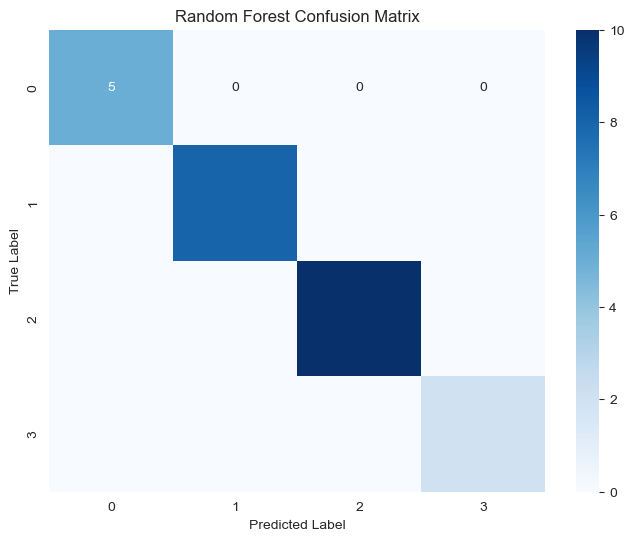

In [54]:
# Generate and display confusion matrix
# Shows how many predictions were correct vs incorrect for each class
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [55]:
# Calculate and display accuracy
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf) * 100
print(f'Accuracy of Random Forest Model: {accuracy_rf:.2f}%')

Accuracy of Random Forest Model: 100.00%


In [56]:
# Display detailed classification report
# Includes precision, recall, f1-score for each class
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(f'Training accuracy: {rf.score(X_train, y_train) * 100:.2f}%')
print(f'Testing accuracy: {rf.score(X_test, y_test) * 100:.2f}%')

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         2

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

Training accuracy: 100.00%
Testing accuracy: 100.00%


## Comprehensive Model Comparison
### Training and evaluating all five classification algorithms

In [57]:
# Define dictionary of models to train and compare
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GaussianNB': GaussianNB(),
    'SVM': SVC(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# List of model names for tracking
modelNames = ['RandomForest', 'GaussianNB', 'SVM', 'DecisionTree', 'KNN']

# Initialize lists to store performance metrics
trainScores = []  # Training accuracy scores
testScores = []   # Testing accuracy scores

# Train and evaluate each model
for m in models:
    model = models[m]
    
    # Train the model
    model.fit(X_train, y_train)
    
    print(f"\n{'='*60}")
    print(f"Model: {m}")
    print(f"{'='*60}")
    
    # Calculate and store training accuracy
    train_score = model.score(X_train, y_train)
    print(f'Train accuracy: {train_score * 100:.2f}%')
    trainScores.append(train_score * 100)
    
    # Calculate and store testing accuracy
    test_score = model.score(X_test, y_test)
    print(f'Test accuracy: {test_score * 100:.2f}%')
    testScores.append(test_score * 100)
    
    # Make predictions on test set
    y_predictions = model.predict(X_test)
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_predictions)
    print(f'\nConfusion Matrix:')
    print(conf_matrix)
    
    # Calculate detailed metrics (for binary-like aggregation)
    # Note: These metrics are simplified for multi-class problems
    accuracy_score = metrics.accuracy_score(y_test, y_predictions)
    print(f'\nAccuracy: {accuracy_score:.4f}')
    
    # Display classification report with precision, recall, f1-score
    print(f'\nClassification Report:')
    print(classification_report(y_test, y_predictions))
    
    print(f"{'='*60}\n")

print("\nAll models trained and evaluated successfully!")


Model: RandomForest
Train accuracy: 100.00%
Test accuracy: 100.00%

Confusion Matrix:
[[ 5  0  0  0]
 [ 0  8  0  0]
 [ 0  0 10  0]
 [ 0  0  0  2]]

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         2

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



Model: GaussianNB
Train accuracy: 100.00%
Test accuracy: 100.00%

Confusion Matrix:
[[ 5  0  0  0]
 [ 0  8  0  0]
 [ 0  0 10  0]
 [ 0  0  0  2]]

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         8
           2       1.00

## Model Performance Comparison Visualization
### Comparing training and testing accuracies across all algorithms

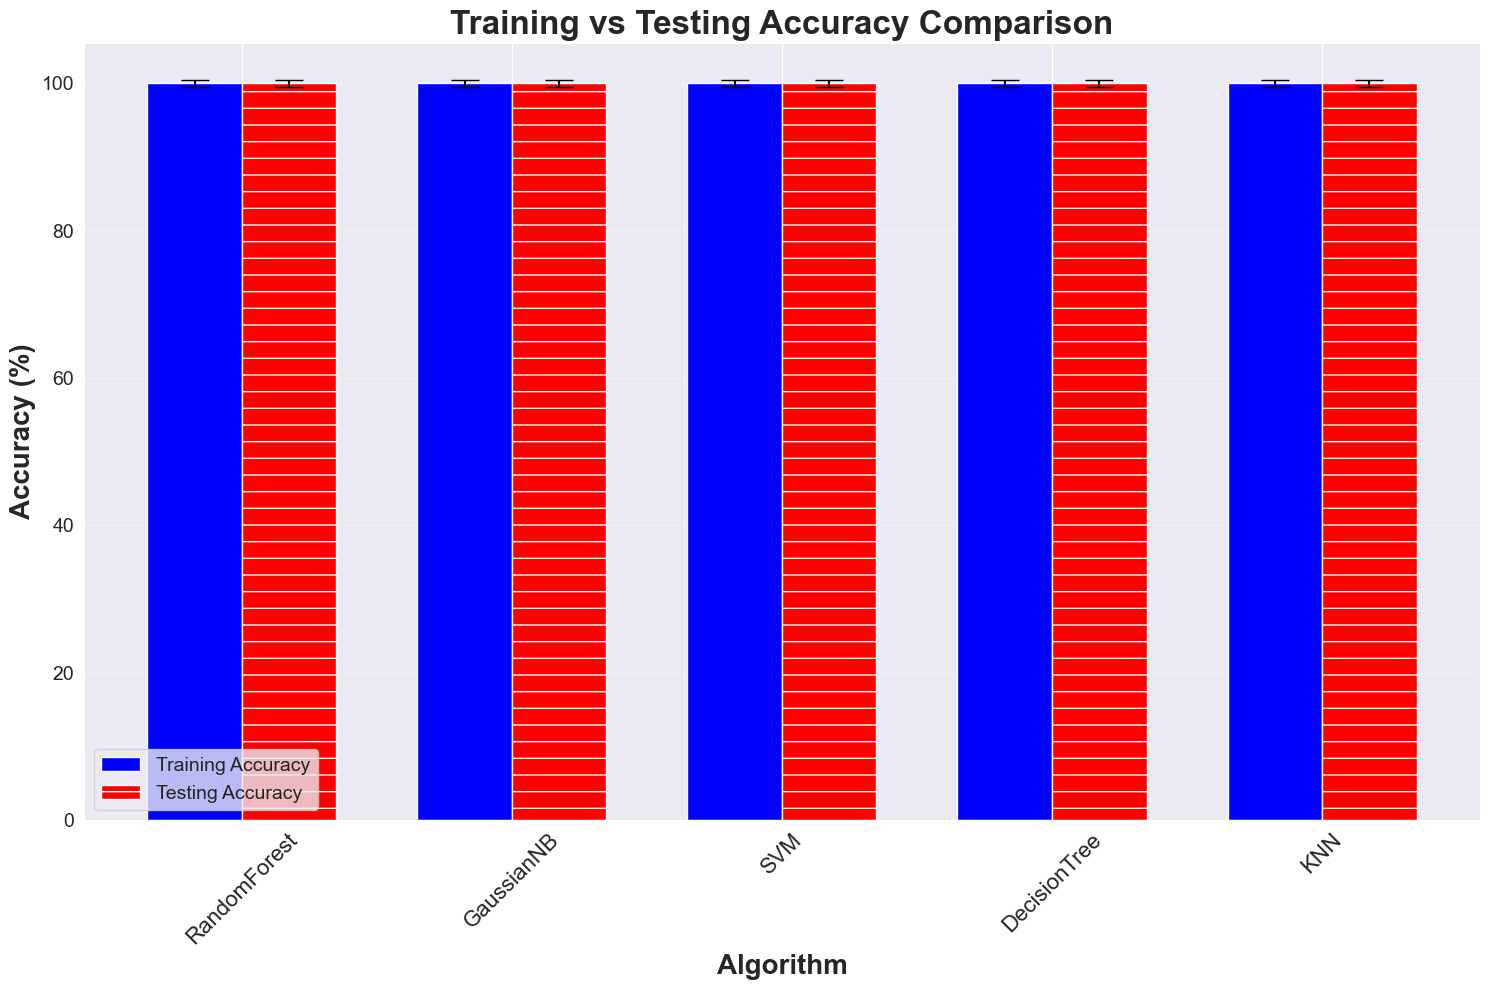

In [58]:
# Create a bar chart comparing train and test scores for all models
plt.figure(figsize=(15, 10))
sns.set_style('darkgrid')
plt.title('Training vs Testing Accuracy Comparison', fontweight='bold', size=24)

# Set bar width for grouped bars
barWidth = 0.35

# Prepare data
bars1 = trainScores  # Training scores
bars2 = testScores   # Testing scores

# Set positions for bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Create bars with error bars for visual emphasis
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', 
        label='Training Accuracy', yerr=0.5, ecolor='black', capsize=10)
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='white', 
        label='Testing Accuracy', yerr=0.5, ecolor='black', capsize=10, hatch='-')

# Recreate model names list (in case it was modified)
modelNames = ['RandomForest', 'GaussianNB', 'SVM', 'DecisionTree', 'KNN']

# Add labels and formatting
plt.xlabel('Algorithm', fontweight='bold', size=20)
plt.ylabel('Accuracy (%)', fontweight='bold', size=20)
plt.xticks([r + barWidth/2 for r in range(len(bars1))], modelNames, rotation=45, size=16)
plt.yticks(size=14)

# Add legend
plt.legend(fontsize=14)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Feature Importance Analysis
### Identifying which features are most important for classification

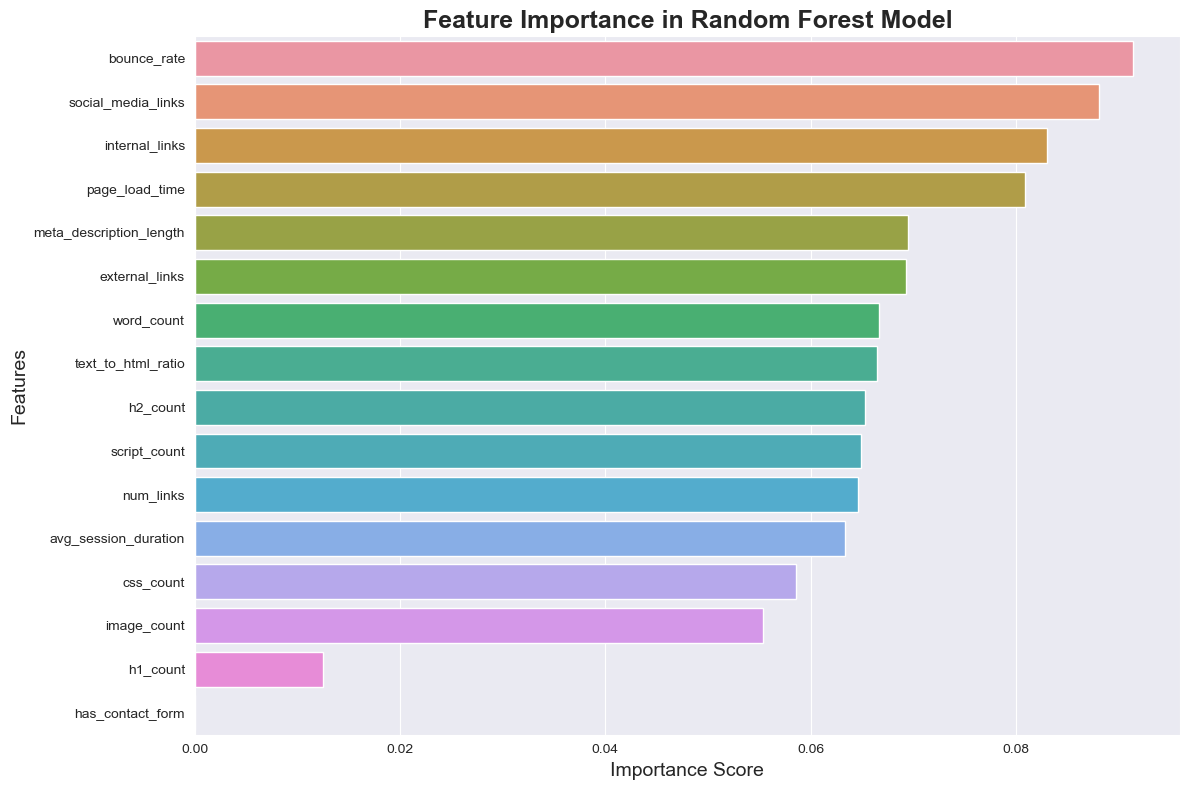


Top 10 Most Important Features:
                    Feature  Importance
10              bounce_rate    0.091411
12       social_media_links    0.088049
14           internal_links    0.083051
9            page_load_time    0.080890
3   meta_description_length    0.069504
13           external_links    0.069252
0                word_count    0.066692
15       text_to_html_ratio    0.066508
5                  h2_count    0.065281
7              script_count    0.064944


In [59]:
# Extract feature importances from the Random Forest model
# Feature importance indicates how useful each feature is for prediction
feature_names = [col for col in df.columns if col not in ['category', 'url']]
importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Model', fontweight='bold', size=18)
plt.xlabel('Importance Score', size=14)
plt.ylabel('Features', size=14)
plt.tight_layout()
plt.show()

# Display top 10 most important features
print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10))

## Model Performance Summary
### Final summary of all model performances

In [60]:
# Create a summary table of all model performances
performance_summary = pd.DataFrame({
    'Algorithm': modelNames,
    'Training Accuracy (%)': trainScores,
    'Testing Accuracy (%)': testScores,
    'Overfitting Gap (%)': [train - test for train, test in zip(trainScores, testScores)]
})

# Sort by testing accuracy in descending order
performance_summary = performance_summary.sort_values('Testing Accuracy (%)', ascending=False)

print("\n" + "="*80)
print("MODEL PERFORMANCE SUMMARY")
print("="*80)
print(performance_summary.to_string(index=False))
print("="*80)

# Identify best and worst models
best_model = performance_summary.iloc[0]
worst_model = performance_summary.iloc[-1]

print(f"\nBest Model: {best_model['Algorithm']} with {best_model['Testing Accuracy (%)']:.2f}% test accuracy")
print(f"Worst Model: {worst_model['Algorithm']} with {worst_model['Testing Accuracy (%)']:.2f}% test accuracy")
print(f"\nPerformance Difference: {best_model['Testing Accuracy (%)'] - worst_model['Testing Accuracy (%)']:.2f}%")


MODEL PERFORMANCE SUMMARY
   Algorithm  Training Accuracy (%)  Testing Accuracy (%)  Overfitting Gap (%)
RandomForest                  100.0                 100.0                  0.0
  GaussianNB                  100.0                 100.0                  0.0
         SVM                  100.0                 100.0                  0.0
DecisionTree                  100.0                 100.0                  0.0
         KNN                  100.0                 100.0                  0.0

Best Model: RandomForest with 100.00% test accuracy
Worst Model: KNN with 100.00% test accuracy

Performance Difference: 0.00%
